https://www.kaggle.com/seshadrikolluri/understanding-the-problem-and-some-sample-paths


https://www.kaggle.com/thexyzt/xyzt-s-visualizations-and-various-tsp-solvers


buscar n primos mais próximos e depois o melhor caminho próximo deles.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

In [7]:
df_cities = pd.read_csv('cities.csv')
df_cities.head()

,CityId,X,Y
0,0,316.836739,2202.340707
1,1,4377.405972,336.602082
2,2,3454.158198,2820.053011
3,3,4688.099298,2935.898056
4,4,1010.696952,3236.750989


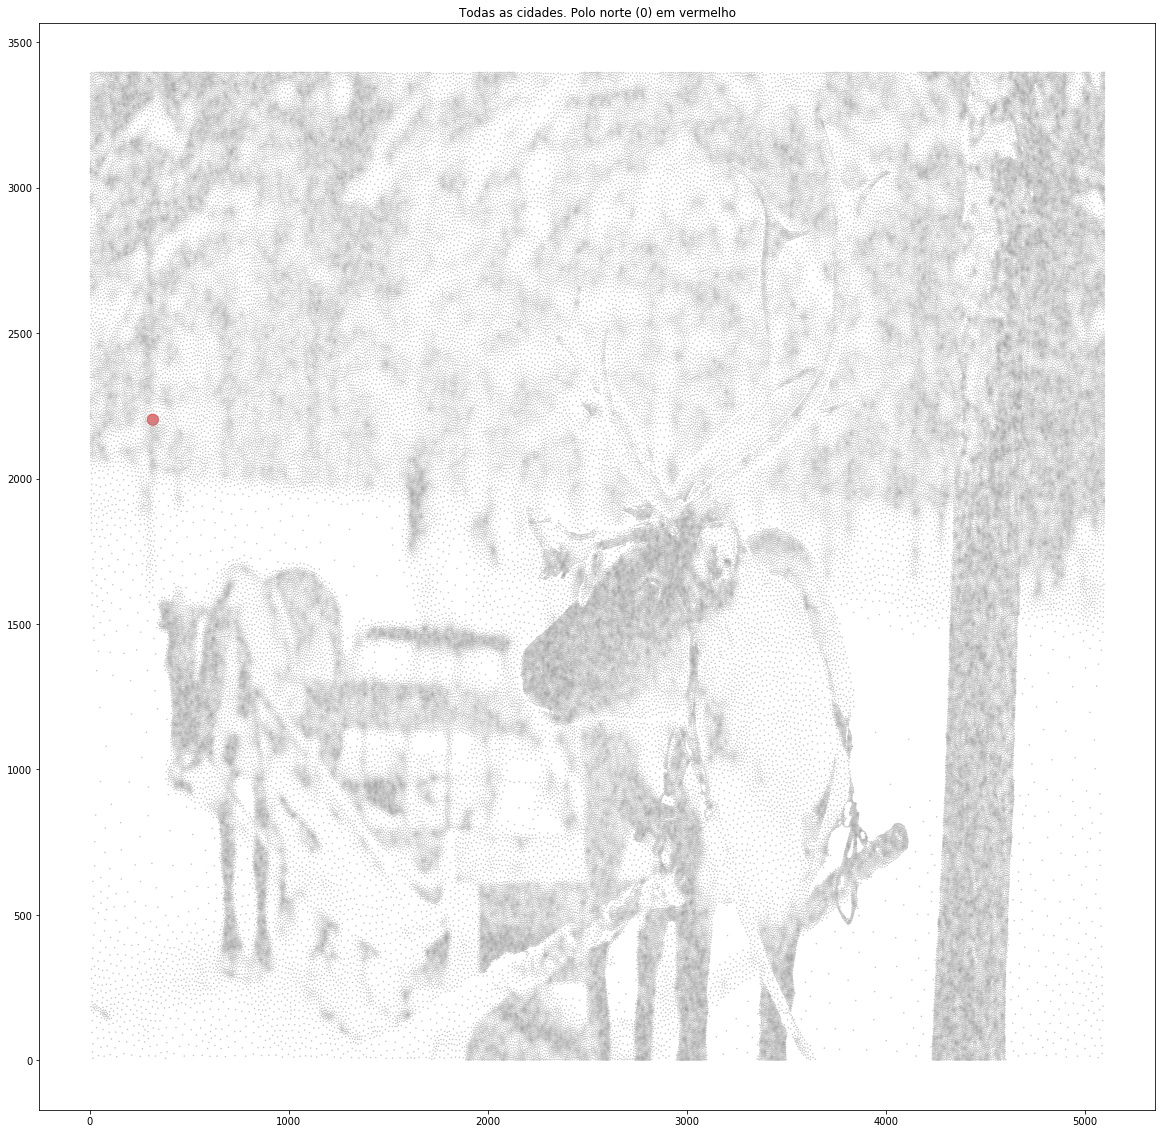

In [15]:
fig = plt.figure(figsize=(20,20))
#cmap, norm = from_levels_and_colors([0.0, 0.5, 1.5], ['red', 'black'])
plt.scatter(df_cities['X'],df_cities['Y'],marker = '.',c=(df_cities.CityId != 0).astype(int), cmap='Set1', alpha = 0.6, s = 500*(df_cities.CityId == 0).astype(int)+1)
plt.title("Todas as cidades. Polo norte (0) em vermelho")
plt.show()

In [9]:
def eratosthenes(n):
    primes = [True for i in range(n+1)] # Start assuming all numbers are primes
    primes[0] = False # 0 is not a prime
    primes[1] = False # 1 is not a prime
    for i in range(2,int(np.sqrt(n)) + 1):
        if primes[i]:
            k = 2
            while i*k <= n:
                primes[i*k] = False
                k += 1
    return(primes)
prime_cities = eratosthenes(max(df_cities.CityId))

In [11]:
df_cities[prime_cities][:10]

,CityId,X,Y
2,2,3454.158198,2820.053011
3,3,4688.099298,2935.898056
5,5,2474.230877,1435.514651
7,7,3408.887685,199.585793
11,11,2052.116500,578.293526
13,13,965.611152,1067.734281
17,17,4313.207563,2800.438423
19,19,3033.179607,515.217613
23,23,3633.815728,2889.995167
29,29,793.107933,1250.697907


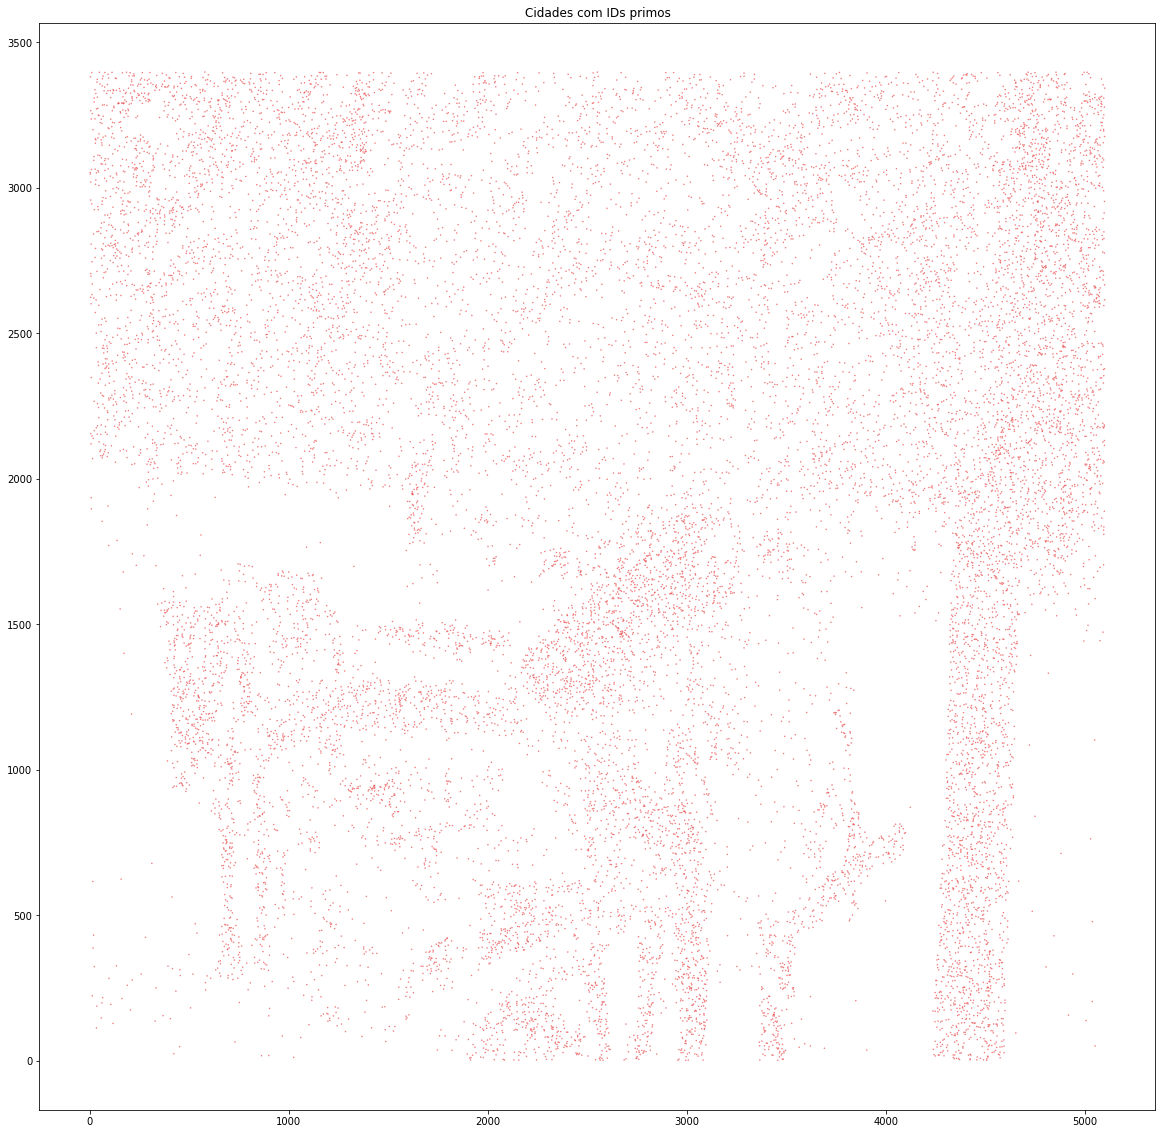

In [14]:
fig = plt.figure(figsize=(20,20))
#cmap, norm = from_levels_and_colors([0.0, 0.5, 1.5], ['red', 'black'])
plt.scatter(df_cities[prime_cities]['X'],df_cities[prime_cities]['Y'],marker = '.',c=(df_cities[prime_cities].CityId != 0).astype(int), cmap='Set1', alpha = 0.6, s = 500*(df_cities[prime_cities].CityId == 0).astype(int)+1)
plt.title("Cidades com IDs primos")
plt.show()

In [16]:
def total_distance(dfcity,path):
    prev_city = path[0]
    total_distance = 0
    step_num = 1
    for city_num in path[1:]:
        next_city = city_num
        total_distance = total_distance + \
            np.sqrt(pow((dfcity.X[city_num] - dfcity.X[prev_city]),2) + pow((dfcity.Y[city_num] - dfcity.Y[prev_city]),2)) * \
            (1+ 0.1*((step_num % 10 == 0)*int(not(prime_cities[prev_city]))))
        prev_city = next_city
        step_num = step_num + 1
    return total_distance

In [41]:
def nearest_neighbour():
    cities = df_cities
    ids = cities.CityId.values[1:]
    xy = np.array([cities.X.values, cities.Y.values]).T[1:]
    path = [0,]
    while len(ids) > 0:
        last_x, last_y = cities.X[path[-1]], cities.Y[path[-1]]
        dist = ((xy - np.array([last_x, last_y]))**2).sum(-1)
        nearest_index = dist.argmin()
        path.append(ids[nearest_index])
        ids = np.delete(ids, nearest_index, axis=0)
        xy = np.delete(xy, nearest_index, axis=0)
    path.append(0)
    return path

In [42]:
nnpath = nearest_neighbour()
print('Total distance with the Nearest Neighbor path '+  "is {:,}".format(total_distance(df_cities,nnpath)))

KeyboardInterrupt: 

---

In [17]:
from sklearn.neighbors import NearestNeighbors

In [19]:
nneigh = NearestNeighbors(n_neighbors=10)
nneigh.fit(df_cities)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=10, p=2, radius=1.0)

In [26]:
nneigh.kneighbors(df_cities,return_distance=False)

array([[     0,     86,    201, ...,    208,     73,    389],
       [     1,     63,     57, ...,    155,     59,    184],
       [     2,     91,    106, ...,     85,    211,     66],
       ...,
       [197766, 197671, 197673, ..., 197541, 197602, 197619],
       [197767, 197640, 197567, ..., 197576, 197596, 197674],
       [197768, 197635, 197597, ..., 197390, 197656, 197540]], dtype=int64)

In [27]:
from scipy.spatial import KDTree

In [32]:
kd = KDTree(df_cities)